# Homework 2s
## PSTAT 131

# Linear Regression and KNN
For this assignment, we will be working with a data set from the UCI (University of California, Irvine) Machine Learning repository [(see website here)](https://archive.ics.uci.edu/dataset/1/abalone). The full data set consists of 4,177  observations of abalone in Tasmania. (Fun fact: Tasmania supplies about 25 
 of the yearly world abalone harvest

The age of an abalone is typically determined by cutting the shell open and counting the number of rings with a microscope. The purpose of this data set is to determine whether abalone age (number of rings + 1.5) can be accurately predicted using other, easier-to-obtain information about the abalone..)

In [1]:
# pip install ucimlrepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 

df = pd.concat([X, y], axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### Question 1
Your goal is to predict abalone age, which is calculated as the number of rings plus 1.5. Notice there currently is no age variable in the data set. Add age to the data set.

Assess and describe the distribution of age.

In [6]:
#Creating Age feature
df['Age'] = df['Rings'] + 1.5
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [8]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


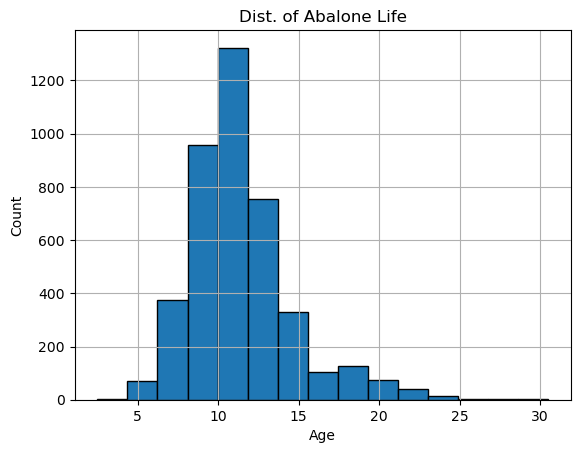

In [10]:
#Creating dist. visualization
plt.hist(df['Age'], edgecolor = 'Black', bins = 15)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Dist. of Abalone Life")
plt.grid(True)

> The visualization reveals a slightly right-skewed distribution with most ages ranging around 8-12 years old before dropping off in frequency significantly at the 15 year mark. We also see the minimum age is 2.5 and the max is 30.5.

### Question 2
Split the abalone data into a training set and a testing set. Use stratified sampling. You should decide on appropriate percentages for splitting the data.

Remember that you’ll need to set a seed at the beginning of the document to reproduce your results.

In [14]:
from sklearn.model_selection import train_test_split
random_seed = 3

In [24]:
#Split Train/Test data
y = df['Age']
x = df.drop('Age', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=x['Sex'], random_state=3)

### Question 3
Using the training data, create a recipe predicting the outcome variable, age, with all other predictor variables. Note that you should not include rings to predict age. Explain why you shouldn’t use rings to predict age.

> First we'll drop the 'Rings' feature as it is a case of structural collinearity where our target variable is directly created from it, this may interfere with our parametric models.

In [243]:
#Dropping Rings
x_train = x_train.drop('Rings', axis = 1);

In [245]:
#Dummy code any categorical predictors
coded_x_train = pd.get_dummies(x_train, columns = ['Sex'])
coded_x_train

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
513,0.310,0.220,0.085,0.1460,0.0610,0.0365,0.0450,0,0,1
2685,0.625,0.480,0.145,1.0850,0.4645,0.2445,0.3270,0,0,1
235,0.295,0.225,0.080,0.1240,0.0485,0.0320,0.0400,0,1,0
1906,0.575,0.450,0.135,0.8245,0.3375,0.2115,0.2390,0,1,0
2691,0.645,0.520,0.180,1.2850,0.5775,0.3520,0.3170,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2972,0.720,0.580,0.190,2.0885,0.9955,0.4780,0.5305,0,0,1
304,0.470,0.360,0.130,0.4720,0.1820,0.1140,0.1500,1,0,0
3536,0.425,0.325,0.110,0.4050,0.1695,0.0920,0.1065,0,1,0
2437,0.335,0.240,0.095,0.1700,0.0620,0.0390,0.0550,0,1,0


In [247]:
#Centering & Scaling all predictors
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = coded_x_train.columns
train_scaled = sc.fit_transform(coded_x_train)
train_scaled = pd.DataFrame(train_scaled, columns = cols)

### Question 4 & 6 & 7 / 8
Linear Regression Model

In [250]:
#Applying same transformations to test_set
x_test = x_test.drop('Rings', axis = 1)
coded_x_test = pd.get_dummies(x_test, columns = ['Sex'])
coded_x_test
cols = coded_x_test.columns
test_scaled = sc.transform(coded_x_test)
test_scaled = pd.DataFrame(test_scaled, columns = cols)

In [258]:
#Making prediction for given inputs
abalone_features = np.array([[0.50, 0.10, 0.30, 4, 1, 2, 1, 1, 0, 0]])
abalone_features = sc.transform(abalone_features)
predicted_age = lr_model.predict(abalone_features)
print(f"Predicted age of the abalone: {predicted_age[0]}")

Predicted age of the abalone: 13.405908634273874


In [270]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
x_train = train_scaled
x_test = test_scaled
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred = lr_model.predict(x_test)

#Calculate R-squared
r2 = r2_score(y_test, y_pred)

#Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)

#Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

print(f"LM R^2: {r2}")
print(f"LM RMSE: {rmse}")
print(f"LM MAE: {mae}")
;

LM R^2: 0.554223552857773
LM RMSE: 2.1784975604223527
LM MAE: 1.5897647626130675


''

### Question 5 & 6 & 8
K-Nearest Neighbors Model

In [275]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors = 7)

knn_model.fit(x_train, y_train)

knn_y_pred = knn_model.predict(x_test)

#Calculate Metrics
r2_knn = r2_score(y_test, knn_y_pred)
rmse_knn = mean_squared_error(y_test, knn_y_pred, squared=False)
mae_knn = mean_absolute_error(y_test, knn_y_pred)

print(f"KNN R^2: {r2_knn}")
print(f"KNN RMSE: {rmse_knn}")
print(f"KNN MAE: {mae_knn}")

KNN R^2: 0.5405231375411773
KNN RMSE: 2.21172100274095
KNN MAE: 1.5512645249487353


### Question 9
Which model performed better on the testing data? Explain why you think this might be. Are you surprised by any of your results? Why or why not?

For both the models we see an R-Squared value hovering around ~.5 with the Linear Regression Model achieving a slightly higher score of .5542 compared the KNN Model's .5405 (With R-Squared score indicating how much of the variance within the target variable is explained by our model). On the other hand the KNN achieved a lower Mean Absolute Error (1.5512 vs 1.5897) but a greater Root Mean Squared Error (2.2117 vs 2.1784) so both models performed relatively similar: poorly. I am not too surprised by these results as I feel there were many issues with feature selection and data scaling / centering that can be improved upon. 1st, for both models we used all features which may be highly correlated (can be proven using Correlation Matrix or VIF) that can especially hurt out Linear Regression model. Additionally we scaled categorical variables as well (sex/type of abalone) which most likely degraded our model's ability to accurately identify appropriate patterns within the dataset. 

## Acknowledgements

- The book *An Introduction to Statistical Learning with Application in Python* was referenced which can be found __[here](https://www.statlearning.com/)__
- Documentation for MatPlotlib.pyplot was referenced __[here](https://matplotlib.org/stable/gallery/index.html)__.
- Documentation for Pandas functions were referenced __[here](https://pandas.pydata.org/pandas-docs/stable/index.html)__
- More general documentation inquiries were answered on GeeksforGeeks like this article and on StackOverflow.